## Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Define Data Paths

In [2]:
train_dir = './train.csv'
test_dir = './test.csv'

submission_dir = './submission.csv'

## Read Training / Testing Data

In [3]:
train = pd.read_csv(train_dir, index_col=0)
test = pd.read_csv(test_dir, index_col=0)
train.head()    # id can be changed to index...

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0


## Data Preprocessing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MO HLADR+ MFI (cells/ul)  86 non-null     float64
 1   Neu CD64+MFI (cells/ul)   86 non-null     float64
 2   CD3+T (cells/ul)          87 non-null     float64
 3   CD8+T (cells/ul)          87 non-null     float64
 4   CD4+T (cells/ul)          87 non-null     float64
 5   NK (cells/ul)             87 non-null     float64
 6   CD19+ (cells/ul)          87 non-null     float64
 7   CD45+ (cells/ul)          87 non-null     float64
 8   Age                       87 non-null     int64  
 9   Sex 0M1F                  87 non-null     int64  
 10  Mono CD64+MFI (cells/ul)  86 non-null     float64
 11  label                     87 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 8.8 KB


In [5]:
train.isnull().any()

MO HLADR+ MFI (cells/ul)     True
Neu CD64+MFI (cells/ul)      True
CD3+T (cells/ul)            False
CD8+T (cells/ul)            False
CD4+T (cells/ul)            False
NK (cells/ul)               False
CD19+ (cells/ul)            False
CD45+ (cells/ul)            False
Age                         False
Sex 0M1F                    False
Mono CD64+MFI (cells/ul)     True
label                       False
dtype: bool

In [6]:
train[train['MO HLADR+ MFI (cells/ul)'].isnull()]

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
39,NaN,NaN,1336.54,739.71,550.3,68.46,192.07,1615.68,21,0,NaN,0


The dataset contains records for 87 training examples. We can detect that there exists NaN values in attribute **MO HLADR+ MFI (cells/ul)**, **Neu CD64+MFI (cells/ul)** and **Mono CD64+MFI (cells/ul)**, we need to process these NaN values.These 3 attributes are all of continuous attributes type, thus we can use median value to fillna.

### 1. Filling Missing Values

In [7]:
MISSING_COLS = ['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)', 'Mono CD64+MFI (cells/ul)']

for SINGLE_COL in MISSING_COLS:    
    # there is only one example that contain missing value for these three attributes (id=39)
    train[SINGLE_COL] = train[SINGLE_COL].replace(np.NaN, train[SINGLE_COL].median())

In [8]:
train.isnull().sum()

MO HLADR+ MFI (cells/ul)    0
Neu CD64+MFI (cells/ul)     0
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    0
label                       0
dtype: int64

In [9]:
train.iloc[[39]]

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
39,1108.5,124.5,1336.54,739.71,550.3,68.46,192.07,1615.68,21,0,1757.5,0


We can see that, there is no NaN values after processing.

In [10]:
test.isnull().sum()    # testing data does not have NaN value to process.

MO HLADR+ MFI (cells/ul)    0
Neu CD64+MFI (cells/ul)     0
CD3+T (cells/ul)            0
CD8+T (cells/ul)            0
CD4+T (cells/ul)            0
NK (cells/ul)               0
CD19+ (cells/ul)            0
CD45+ (cells/ul)            0
Age                         0
Sex 0M1F                    0
Mono CD64+MFI (cells/ul)    0
dtype: int64

### 2. EDA

In [11]:
# binary-classification -> check whether it is balance or not
train['label'].value_counts()    # not necessary a unbalanced problem, thus we may not process this...

0    58
1    29
Name: label, dtype: int64

#### 2.1 PairPlot

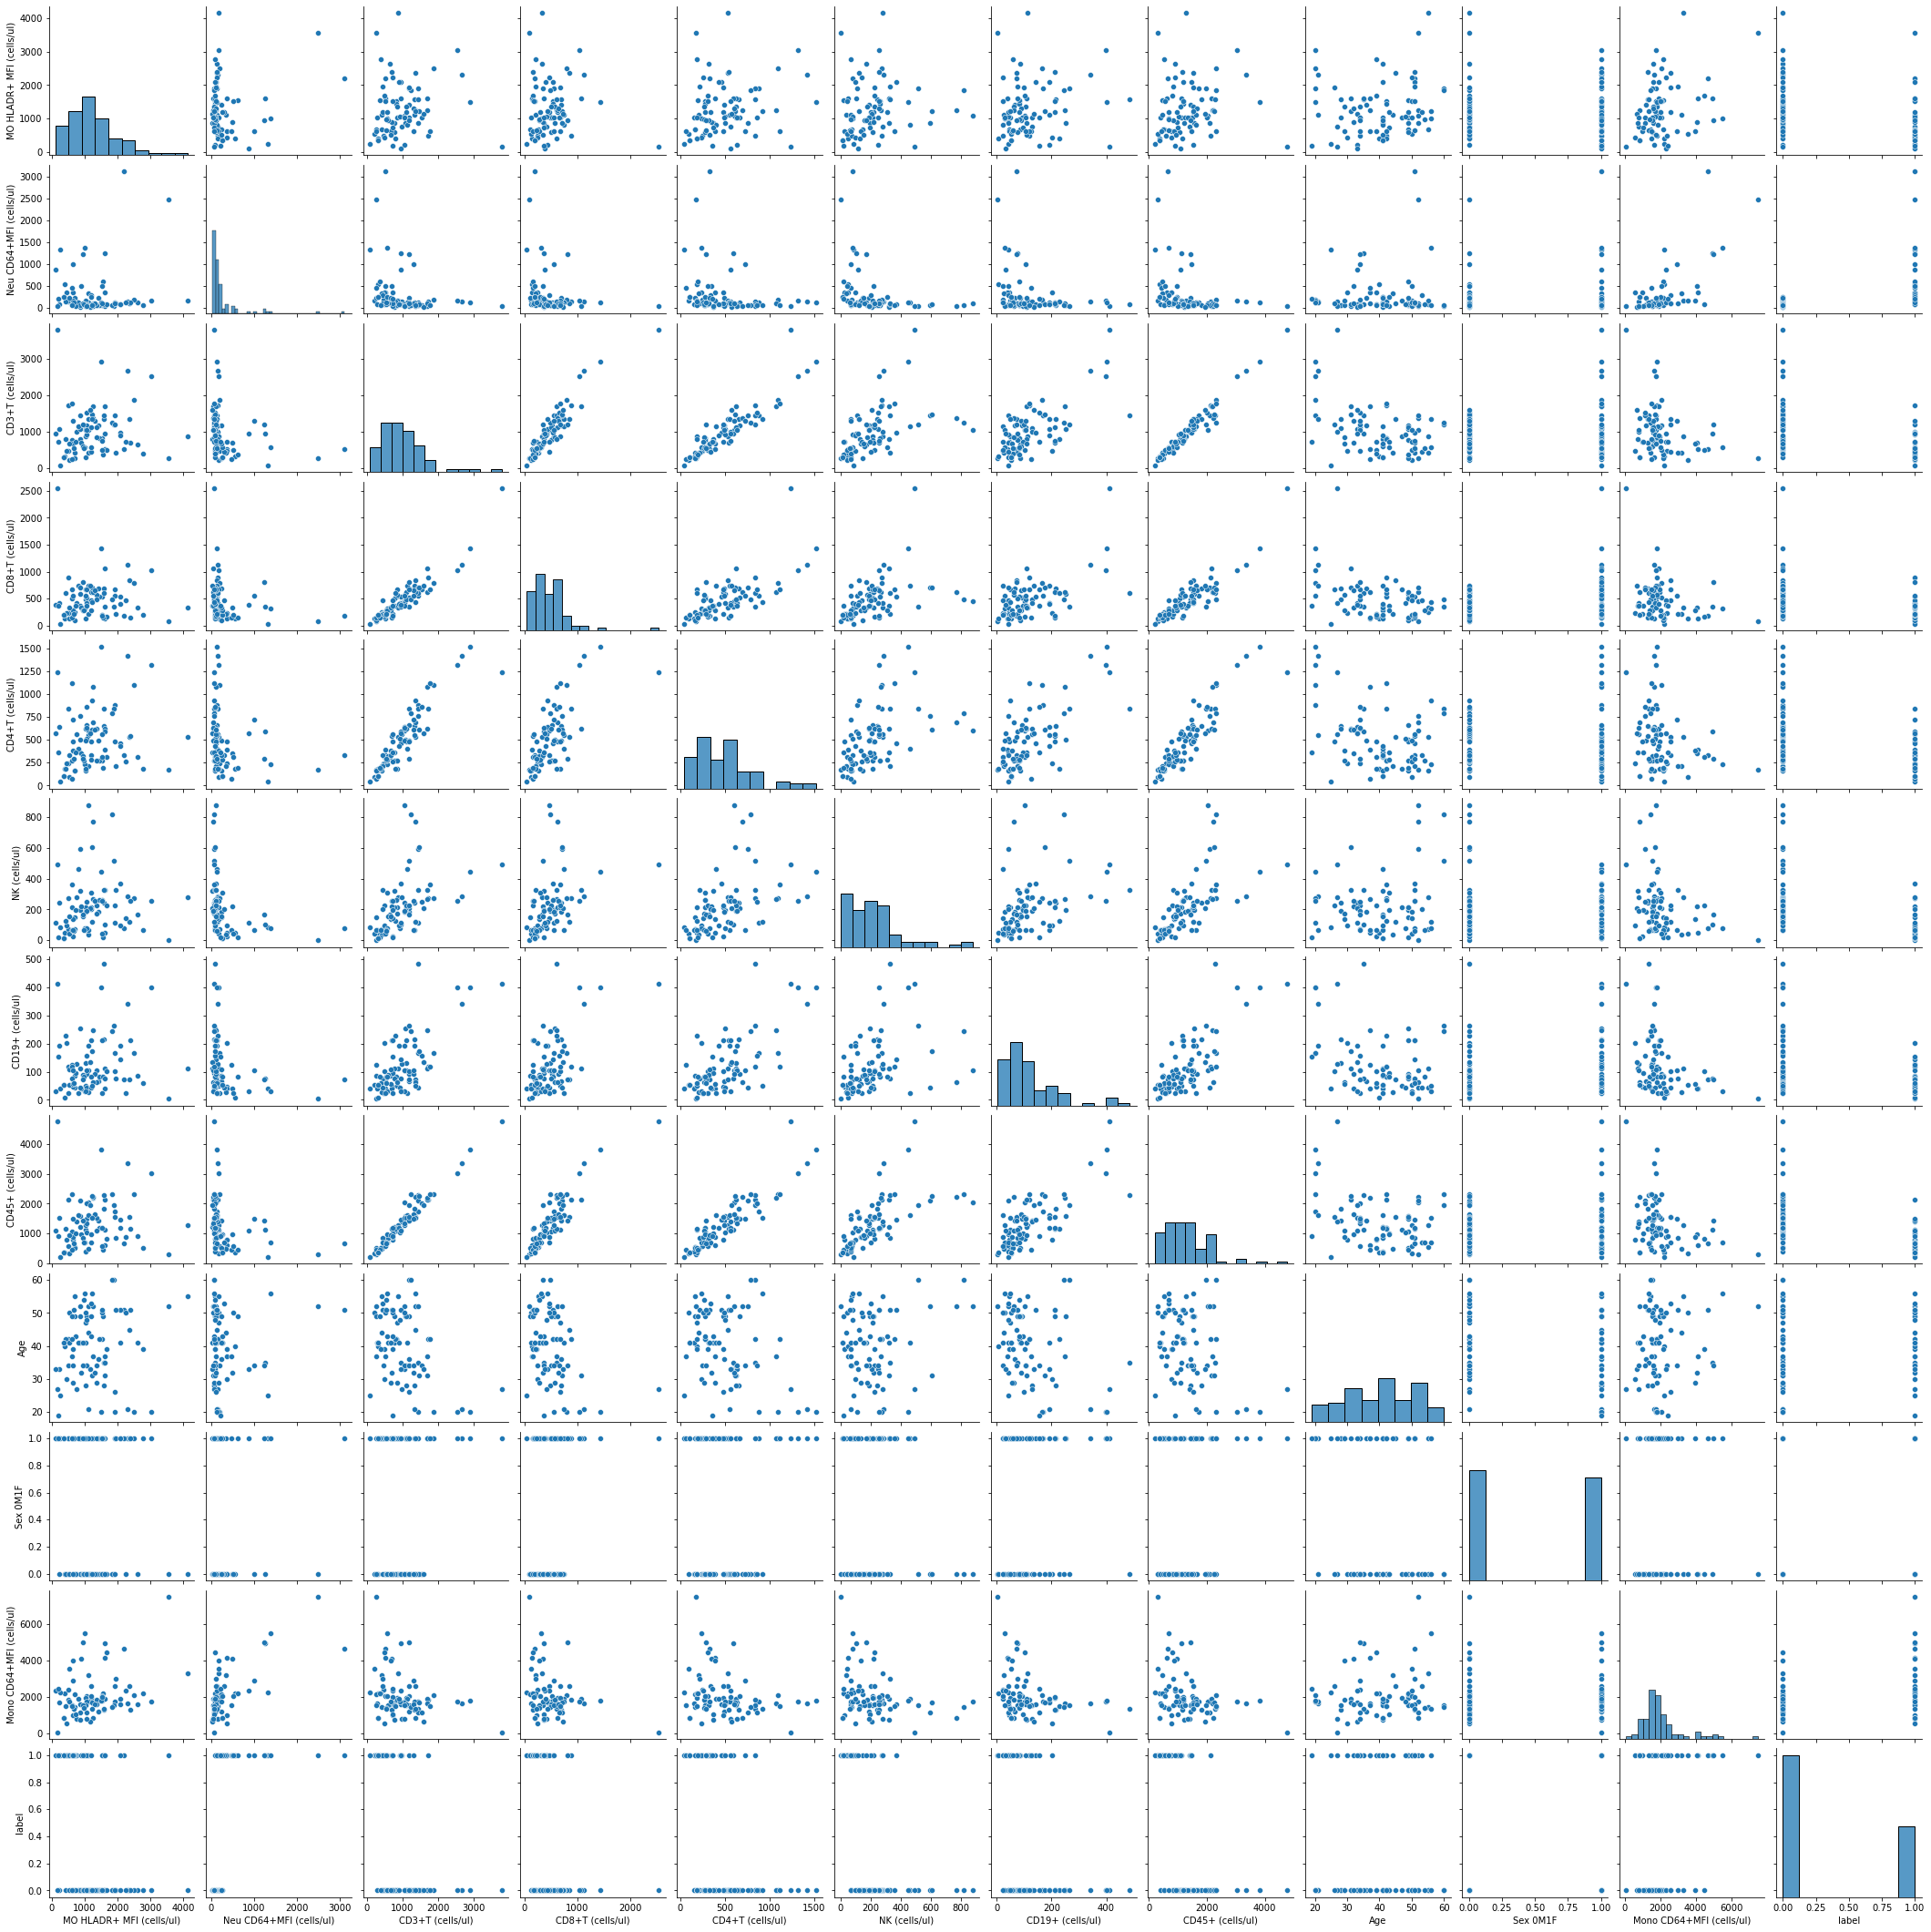

In [12]:
# more co-linearity of features (feature selection)

sns.pairplot(train)

#### 2.2 Correlation Heatmaps

In [13]:
train.corr()

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
MO HLADR+ MFI (cells/ul),1.000000,0.136605,0.117610,0.009786,0.203537,0.108356,0.154832,0.128639,0.115823,-0.013771,0.317058,-0.277219
Neu CD64+MFI (cells/ul),0.136605,1.000000,-0.254134,-0.244687,-0.230124,-0.314292,-0.252843,-0.298117,0.080529,0.072144,0.693063,0.535598
CD3+T (cells/ul),0.117610,-0.254134,1.000000,0.922860,0.908698,0.490868,0.683677,0.976349,-0.424930,0.169888,-0.302119,-0.421029
CD8+T (cells/ul),0.009786,-0.244687,0.922860,1.000000,0.694546,0.435026,0.574748,0.892774,-0.389399,0.189577,-0.289374,-0.375862
CD4+T (cells/ul),0.203537,-0.230124,0.908698,0.694546,1.000000,0.486929,0.680828,0.902458,-0.351990,0.117779,-0.263313,-0.384415
NK (cells/ul),0.108356,-0.314292,0.490868,0.435026,0.486929,1.000000,0.362444,0.650616,0.118311,-0.121864,-0.285767,-0.466103
CD19+ (cells/ul),0.154832,-0.252843,0.683677,0.574748,0.680828,0.362444,1.000000,0.735075,-0.347836,0.154152,-0.330657,-0.369889
CD45+ (cells/ul),0.128639,-0.298117,0.976349,0.892774,0.902458,0.650616,0.735075,1.000000,-0.348239,0.122516,-0.339378,-0.478815
Age,0.115823,0.080529,-0.424930,-0.389399,-0.351990,0.118311,-0.347836,-0.348239,1.000000,-0.181716,0.115310,0.041413
Sex 0M1F,-0.013771,0.072144,0.169888,0.189577,0.117779,-0.121864,0.154152,0.122516,-0.181716,1.000000,-0.005305,0.048795


<AxesSubplot:>

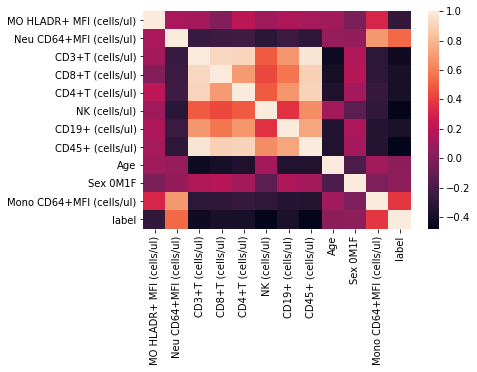

In [14]:
sns.heatmap(train.corr())

Except for "Age" and "Sex", it seems other attributes all have stronger correlations.

### 3. Feature Engineering and Data Transformation

#### 3.1 Log Transformation for numerical values (except Age)

In [15]:
NUMERICAL_COLS = list(set(train.columns) - set(['Sex 0M1F', 'label']))
TARGET_COLS = list(set(NUMERICAL_COLS) - set(['Age']))
TARGET_COLS

['CD19+ (cells/ul)',
 'CD8+T (cells/ul)',
 'CD3+T (cells/ul)',
 'MO HLADR+ MFI (cells/ul)',
 'NK (cells/ul)',
 'CD45+ (cells/ul)',
 'CD4+T (cells/ul)',
 'Mono CD64+MFI (cells/ul)',
 'Neu CD64+MFI (cells/ul)']

In [16]:
train

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,3556.0,2489.0,265.19,77.53,176.55,0.00,4.20,307.91,52,0,7515.0,1
1,1906.0,134.0,1442.61,551.90,876.07,112.10,168.15,1735.48,20,1,1756.0,0
2,1586.0,71.0,1332.74,684.20,655.26,244.95,216.52,1820.04,28,1,1311.0,0
3,683.0,94.0,419.23,255.80,162.17,72.05,44.68,538.22,55,1,1443.0,0
4,1032.0,71.0,1102.72,480.27,625.30,188.78,130.77,1427.97,28,1,1542.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82,626.0,68.0,1771.57,666.99,1117.48,360.21,118.84,2306.82,42,1,1521.0,0
83,1237.0,71.0,1348.53,428.09,924.69,120.02,48.67,1524.78,56,0,1345.0,0
84,634.0,1002.0,1300.00,558.00,724.00,67.00,105.00,1484.26,34,0,2926.0,1


In [17]:
def log_transform(data, TARGET_COLS):
    for COL in TARGET_COLS:
        data[COL] = np.where(data[COL]!=0, np.log10(data[COL]), 0)
    return data

In [18]:
train = log_transform(train, TARGET_COLS)
test = log_transform(test, TARGET_COLS)

In [19]:
train.head()

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,3.550962,3.396025,2.423557,1.889470,2.246868,0.000000,0.623249,2.488424,52,0,3.875929,1
1,3.280123,2.127105,3.159149,2.741860,2.942539,2.049606,2.225697,3.239420,20,1,3.244525,0
2,3.200303,1.851258,3.124745,2.835183,2.816414,2.389077,2.335498,3.260081,28,1,3.117603,0
3,2.834421,1.973128,2.622452,2.407901,2.209971,1.857634,1.650113,2.730960,55,1,3.159266,0
4,3.013680,1.851258,3.042465,2.681485,2.796088,2.275956,2.116508,3.154719,28,1,3.188084,0


In [20]:
test.head()

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul)
id,,,,,,,,,,,
0,3.453777,2.193125,3.133066,2.863787,2.804719,2.104009,1.976900,3.201020,45,1,3.512684
1,2.640481,2.136721,2.707085,2.428216,2.385731,2.592021,1.992288,3.001197,51,1,2.691081
2,2.916980,1.913814,3.090688,2.693217,2.871620,2.712885,2.505354,3.342537,32,0,3.140194
3,2.935003,1.698970,3.179799,2.966381,2.770904,2.580069,1.411620,3.285355,50,0,3.138934
4,3.064458,2.195900,2.949595,2.606285,2.689779,2.426381,1.942653,3.097438,43,0,3.265761


#### 3.2 Age Transformation
Take "Age" data, splitting it into boxes, and tag them into categories to overcome the overfitting problem to some extends.

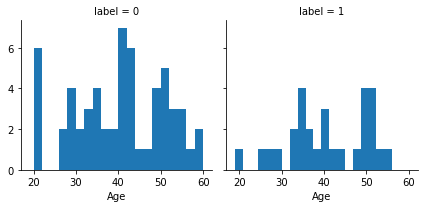

In [21]:
g = sns.FacetGrid(train, col='label')
g.map(plt.hist, 'Age', bins=20)

In [22]:
# distribution of "Age" attribute
train[['Age']].describe()

,Age
count,87.000000
mean,40.218391
std,10.461919
min,19.000000
25%,33.000000
50%,41.000000
75%,49.500000
max,60.000000


(array([ 7.,  4.,  7., 13.,  7., 17.,  3., 17.,  8.,  4.]),
 array([19. , 23.1, 27.2, 31.3, 35.4, 39.5, 43.6, 47.7, 51.8, 55.9, 60. ]),
 <BarContainer object of 10 artists>)

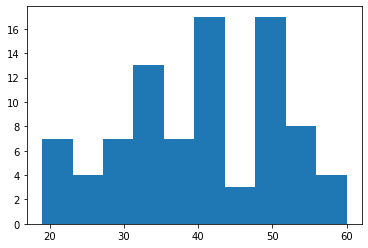

In [23]:
plt.hist(train[['Age']])    # 10 bins (we can try 5 bins further...)

In [24]:
# distribution of "Age" attribute
test[['Age']].describe()

,Age
count,59.000000
mean,41.186441
std,9.438503
min,15.000000
25%,34.500000
50%,42.000000
75%,49.000000
max,62.000000


(array([ 1.,  1.,  4.,  6., 12.,  9., 10.,  9.,  6.,  1.]),
 array([15. , 19.7, 24.4, 29.1, 33.8, 38.5, 43.2, 47.9, 52.6, 57.3, 62. ]),
 <BarContainer object of 10 artists>)

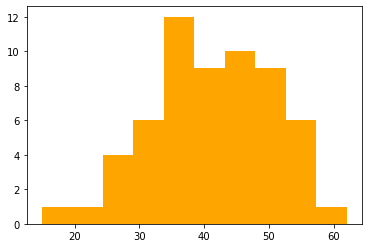

In [25]:
plt.hist(test[['Age']], color='orange')    # 10 bins (we can try 5 bins further...)

In [26]:
ages = list(train['Age'])
bins = [0, 30, 40, 50, 100]    # 4 bins: <30, 30~40, 40~50, >50

agesgroup = pd.cut(ages, bins)
print(agesgroup.categories)
agesgroup.codes

IntervalIndex([(0, 30], (30, 40], (40, 50], (50, 100]],
              closed='right',
              dtype='interval[int64]')


array([3, 0, 0, 3, 0, 2, 2, 2, 0, 1, 3, 3, 3, 2, 1, 1, 2, 0, 0, 1, 1, 1,
       2, 0, 2, 2, 3, 3, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 3, 0, 2, 1, 2, 1,
       0, 3, 3, 3, 1, 1, 2, 0, 1, 3, 2, 2, 2, 2, 3, 0, 2, 1, 1, 0, 3, 1,
       2, 1, 2, 0, 3, 2, 3, 1, 1, 1, 2, 2, 2, 3, 0, 2, 2, 3, 1, 1, 0],
      dtype=int8)

In [27]:
train[['Age']] = agesgroup.codes
train.head()

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul),label
id,,,,,,,,,,,,
0,3.550962,3.396025,2.423557,1.889470,2.246868,0.000000,0.623249,2.488424,3,0,3.875929,1
1,3.280123,2.127105,3.159149,2.741860,2.942539,2.049606,2.225697,3.239420,0,1,3.244525,0
2,3.200303,1.851258,3.124745,2.835183,2.816414,2.389077,2.335498,3.260081,0,1,3.117603,0
3,2.834421,1.973128,2.622452,2.407901,2.209971,1.857634,1.650113,2.730960,3,1,3.159266,0
4,3.013680,1.851258,3.042465,2.681485,2.796088,2.275956,2.116508,3.154719,0,1,3.188084,0


In [28]:
# also transform "Age" in testing data
ages_1 = list(test['Age'])
agesgroup_1 = pd.cut(ages_1, bins)
print(agesgroup_1.categories)
agesgroup_1.codes

IntervalIndex([(0, 30], (30, 40], (40, 50], (50, 100]],
              closed='right',
              dtype='interval[int64]')


array([2, 3, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 0, 1, 0, 1, 3, 3, 0, 2,
       3, 1, 0, 2, 1, 2, 3, 2, 3, 1, 3, 2, 3, 1, 2, 1, 2, 3, 2, 0, 2, 1,
       2, 3, 1, 1, 1, 2, 2, 1, 0, 0, 1, 3, 1, 1, 1], dtype=int8)

In [29]:
test[['Age']] = agesgroup_1.codes
test.head()

,MO HLADR+ MFI (cells/ul),Neu CD64+MFI (cells/ul),CD3+T (cells/ul),CD8+T (cells/ul),CD4+T (cells/ul),NK (cells/ul),CD19+ (cells/ul),CD45+ (cells/ul),Age,Sex 0M1F,Mono CD64+MFI (cells/ul)
id,,,,,,,,,,,
0,3.453777,2.193125,3.133066,2.863787,2.804719,2.104009,1.976900,3.201020,2,1,3.512684
1,2.640481,2.136721,2.707085,2.428216,2.385731,2.592021,1.992288,3.001197,3,1,2.691081
2,2.916980,1.913814,3.090688,2.693217,2.871620,2.712885,2.505354,3.342537,1,0,3.140194
3,2.935003,1.698970,3.179799,2.966381,2.770904,2.580069,1.411620,3.285355,2,0,3.138934
4,3.064458,2.195900,2.949595,2.606285,2.689779,2.426381,1.942653,3.097438,2,0,3.265761


#### 2.2 One-hot Encoding for Age attribute

In [30]:
# train['Age'] = train['Age'].astype(str)
# test['Age'] = test['Age'].astype(str)

# train[['Age_<30','Age_30<40','Age_40<50','Age>50']] = pd.get_dummies(train['Age'])
# test[['Age_<30','Age_30<40','Age_40<50','Age>50']] = pd.get_dummies(test['Age'])

# train = train.drop('Age',axis=1)
# test = test.drop('Age',axis=1)

In [31]:
# train.head()

## Normalizing

In [32]:
# features = list(set(train.columns) - set(['id', 'label']))

# train_features = train[features]

# train_normalized =(train_features - train_features.mean()) / train_features.std()
# train_normalized.head()

In [33]:
# features_1 = list(set(test.columns) - set(['id', 'label']))

# test_features = test[features_1]

# test_normalized =(test_features - test_features.mean()) / test_features.std()
# test_normalized.head()

### Derive X_train, y_train, X_test for Prediction

In [34]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

X_test = test

In [35]:
# # X_train, y_train
# X_train = train_normalized
# y_train = train['label']

# # X_test
# X_test = test_normalized

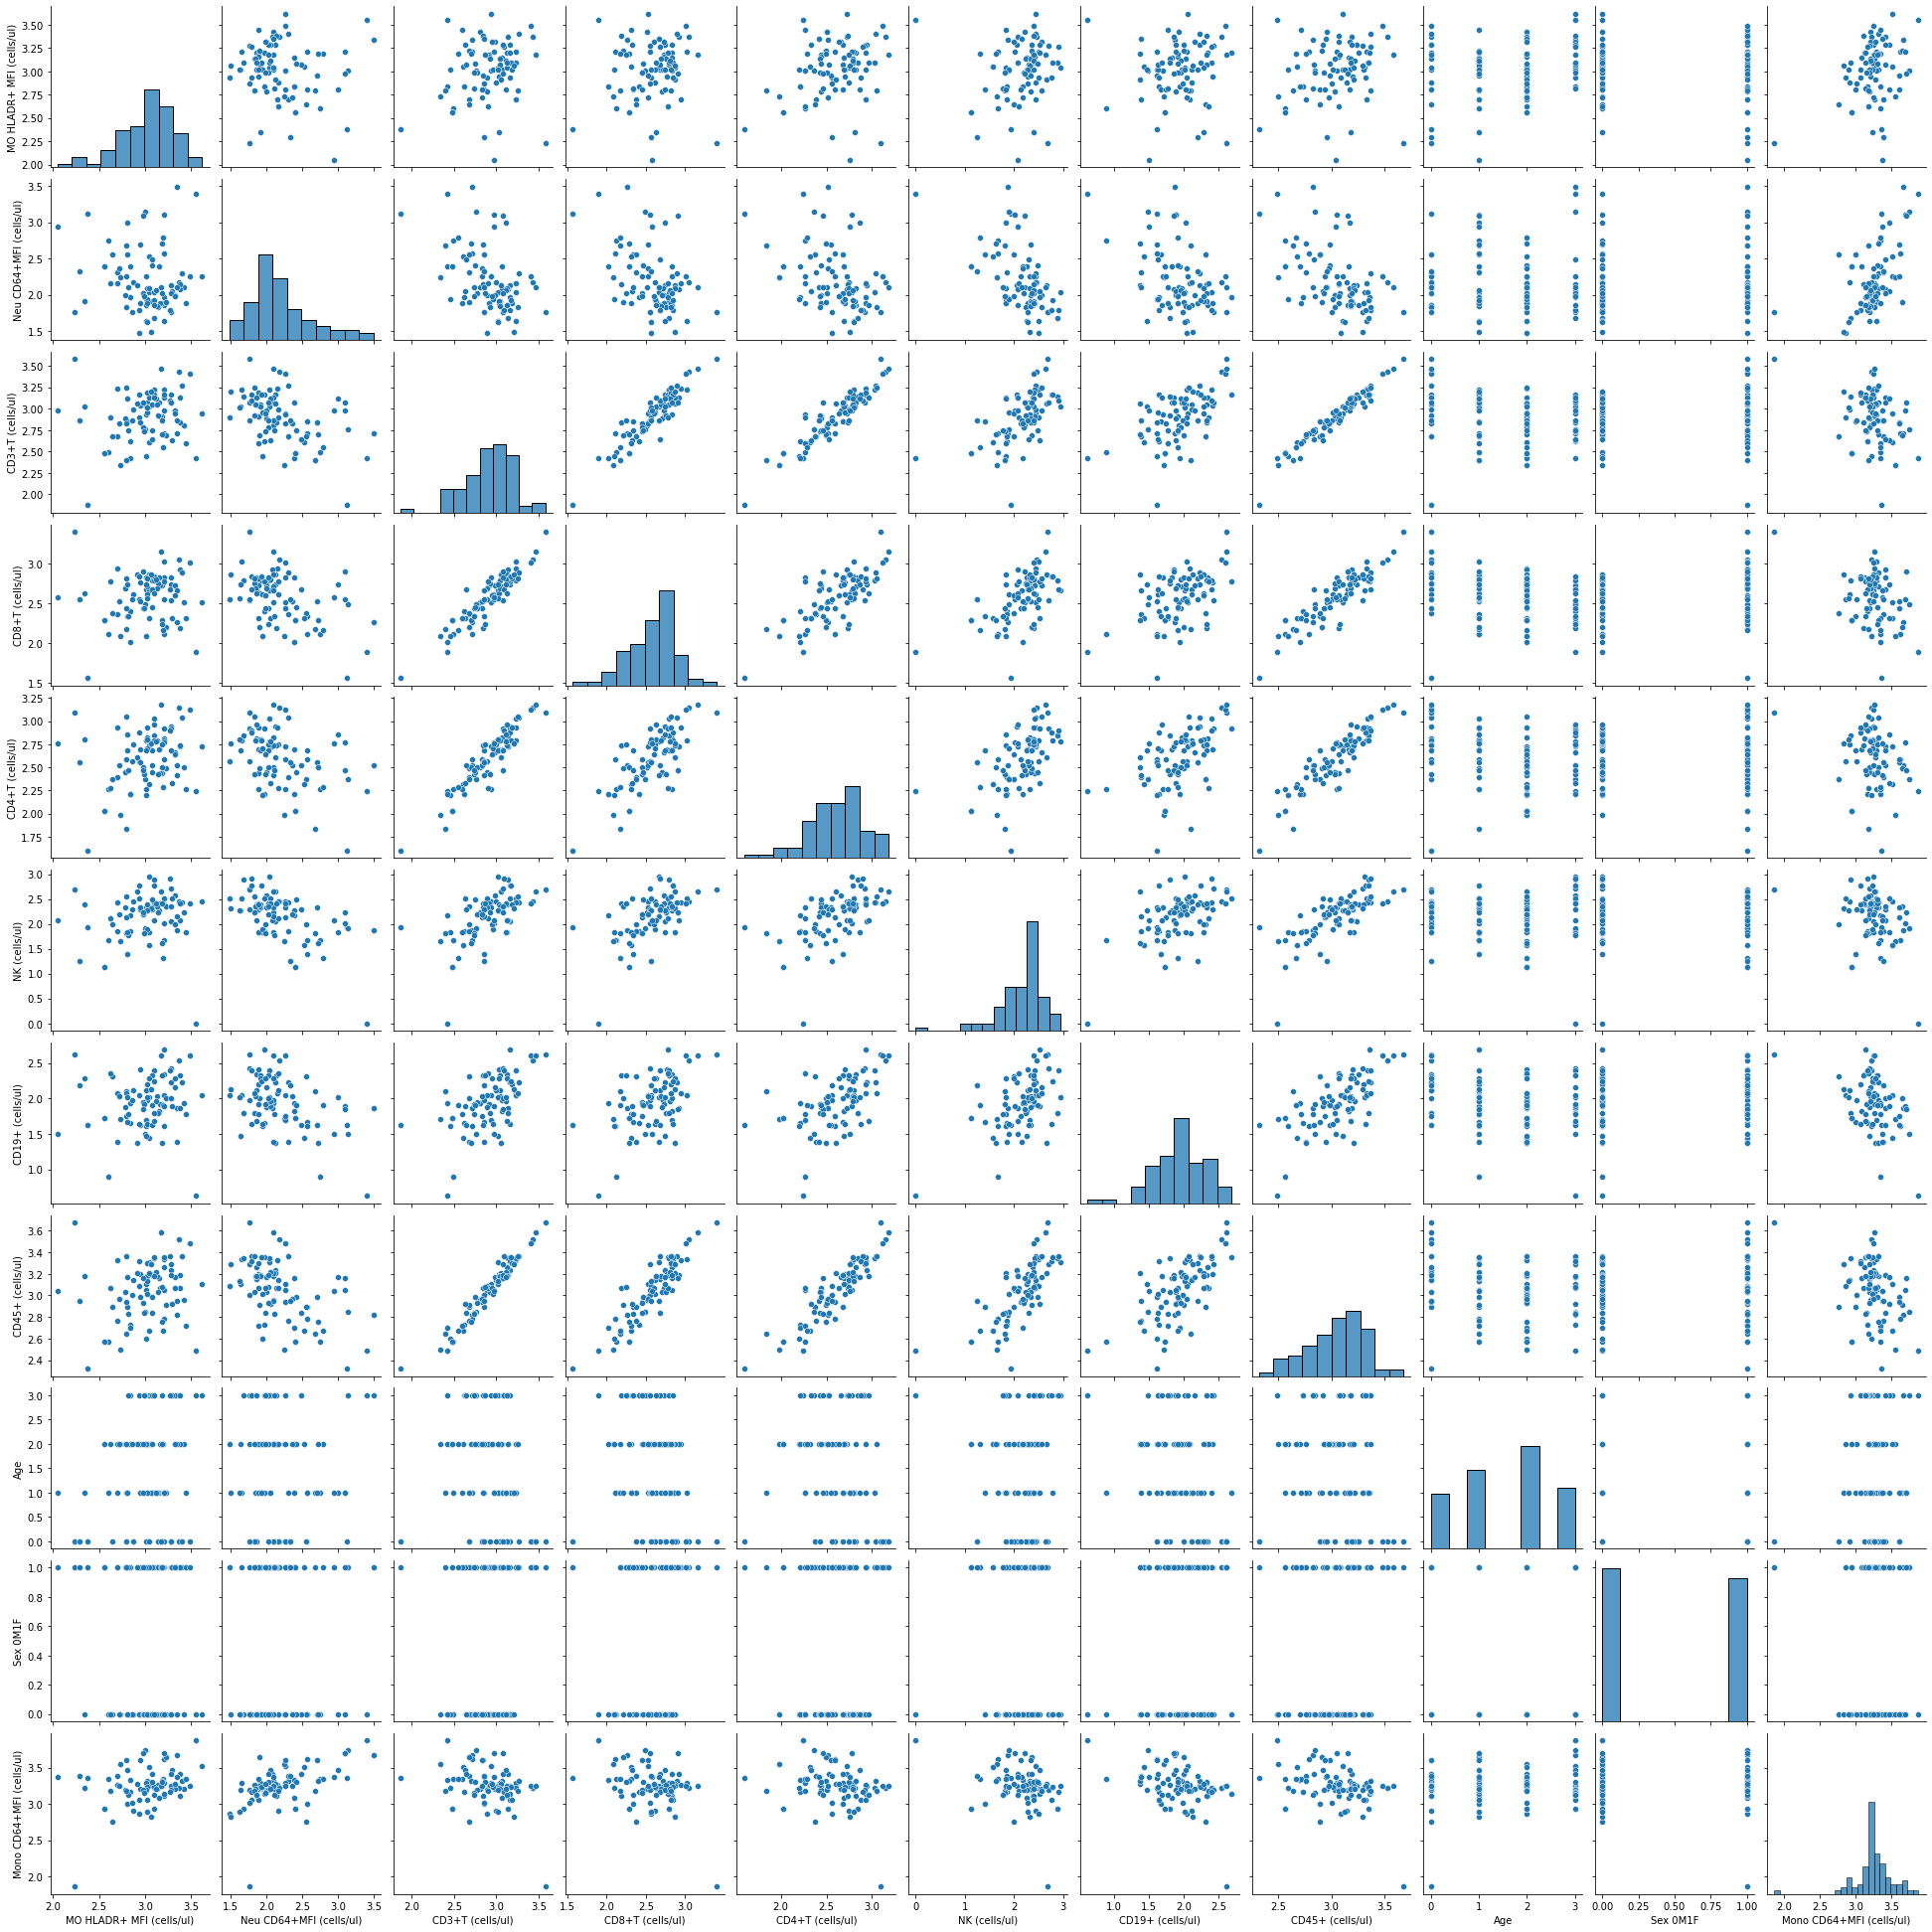

In [36]:
sns.pairplot(X_train)

## Model Selection & Prediction

Bias & Variance Trade-off: </br>

    1. compare training error (predict_proba, accuracy_score) and validation error (leave-one-out, cross validation)
    2. detect whether the model is underfitting / overfitting
   
Select the Best Model & HyperParameters:</br>

    Grid Search Method

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.ensemble import RandomForestClassifier


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score

### Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=50, random_state=0)

In [40]:
rf.fit(X_train,y_train)
test_y = rf.predict_proba(X_train)

y_pred = []
for proba in test_y[:,0]:
    if proba >= 0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

y_pred = pd.Series(y_pred)

print(accuracy_score(y_train, y_pred))
# print(classification_report(y_train, y_pred))

1.0


In [41]:
scores = cross_val_score(rf, X_train, y_train, cv=LeaveOneOut(), scoring='accuracy')
scores.mean()

0.9195402298850575

In [42]:
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
scores.mean()

0.9430555555555555

(10, 10)


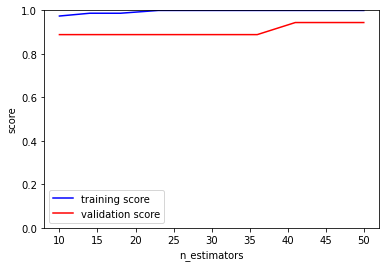

In [43]:
from sklearn.model_selection import validation_curve
parameter_grid = np.linspace(10,50,10).astype(int)
train_score, val_score = validation_curve(rf, X_train, y_train, 
                                          'n_estimators', parameter_grid, cv=10)

print(train_score.shape)
plt.plot(parameter_grid, np.median(train_score, 1), color='blue', label='training score')
plt.plot(parameter_grid, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score');

In [44]:
# Random Forest
# parameters = {'n_estimators':[5,10,30,50,100,150,200], 'max_depth':[3,5,10,20,50,100], 'criterion':('gini','entropy'), 'min_samples_split':[2,5,10],
#              'min_samples_leaf':[1,2,5],'max_features':["auto", "sqrt", "log2"],
#              'oob_score':[True,False],'class_weight':["balanced","balanced_subsample"]}

param_grid = {
    'criterion':('gini','entropy'),
    'n_estimators': [20, 30, 50, 100, 200],
#     'max_depth': [2, 4, 6, 8],
#     'min_samples_split': [2, 5, 8, 10],
#     'max_samples': [0.2, 0.4, 0.6, 0.8],
#     'min_samples_leaf': [1, 2, 5]
     }

# rf = RandomForestClassifier(n_estimators=50, random_state=0, bootstrap=True)
# rf = RandomForestClassifier(
# #     n_estimators=20,
# #     criterion = 'entropy',
#     max_depth=6, 
#     max_samples=0.4,
#     max_features='sqrt',
#     min_samples_split=5,
#     bootstrap=True,
#     random_state=0)

grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': [20, 30, 50, 100, 200]},
             scoring='accuracy')

In [45]:
for params, accuracy in zip(
    grid.cv_results_["params"],
    grid.cv_results_["mean_test_score"]
):
    print(params, "accuracy: %.4f" % accuracy)

print(f'\nBest Parameters: {grid.best_params_}')

{'criterion': 'gini', 'n_estimators': 20} accuracy: 0.9083
{'criterion': 'gini', 'n_estimators': 30} accuracy: 0.9208
{'criterion': 'gini', 'n_estimators': 50} accuracy: 0.9431
{'criterion': 'gini', 'n_estimators': 100} accuracy: 0.9208
{'criterion': 'gini', 'n_estimators': 200} accuracy: 0.9319
{'criterion': 'entropy', 'n_estimators': 20} accuracy: 0.9208
{'criterion': 'entropy', 'n_estimators': 30} accuracy: 0.9083
{'criterion': 'entropy', 'n_estimators': 50} accuracy: 0.9306
{'criterion': 'entropy', 'n_estimators': 100} accuracy: 0.9083
{'criterion': 'entropy', 'n_estimators': 200} accuracy: 0.9083

Best Parameters: {'criterion': 'gini', 'n_estimators': 50}


### Derive Final Testing Result

In [46]:
rf_model = grid.best_estimator_    # use the best parameters for model

In [47]:
y_test = rf_model.fit(X_train, y_train).predict(X_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [48]:
# Write final results to submission.csv
y_test_df = pd.DataFrame(y_test).reset_index()
y_test_df.columns = ["id", "label"]
y_test_df.to_csv(submission_dir, index=False)